In [ ]:
# Code snippet from Google Collab to capture an image using a webcam
# Hyper-Paramater : quality (0-1)
# Output : filename -> name of file (file is saved in same directory)

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

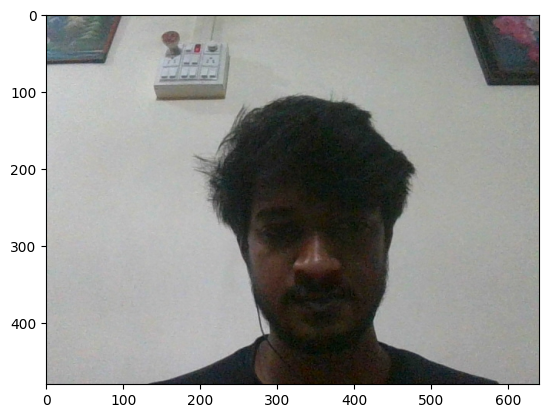

In [ ]:
#Displaying the image

import matplotlib.pyplot as plt
import matplotlib.image as img

try:
  filename = take_photo()
  # print('Saved to {}'.format(filename))   #To save the image
  image = img.imread(filename)
  plt.imshow(image)
  plt.show()


except Exception as err:
  print(str(err))

In [ ]:
print(image)

[[[ 74 133 103]
  [ 73 126  98]
  [ 87 122  98]
  ...
  [ 84 102 116]
  [ 73  90 106]
  [ 71  88 106]]

 [[ 76 132 107]
  [ 74 123 101]
  [ 79 117  96]
  ...
  [ 88 106 120]
  [ 86 102 117]
  [ 88 106 120]]

 [[ 82 128 115]
  [ 78 122 109]
  [ 86 120 104]
  ...
  [115 132 139]
  [116 130 141]
  [116 132 145]]

 ...

 [[168 168 168]
  [172 172 172]
  [170 170 170]
  ...
  [149 151 148]
  [148 154 150]
  [146 151 147]]

 [[171 169 172]
  [173 171 174]
  [169 167 170]
  ...
  [148 158 150]
  [149 159 151]
  [148 155 148]]

 [[173 171 174]
  [172 170 173]
  [172 170 173]
  ...
  [151 158 151]
  [152 157 151]
  [149 156 148]]]


In [ ]:
print(filename)

photo.jpg


In [ ]:
image.shape

(480, 640, 3)